In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

In [2]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [5]:
def intra_cluster_distance(data, clusters, centroids):
    total_distance = 0
    for i, cluster_points in clusters.items():
        distances = [np.linalg.norm(point - centroids[i]) ** 2 for point in cluster_points]
        total_distance += np.sum(distances)
    return total_distance / len(data)


In [3]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}

    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]

    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)

        # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
        old_centroids = centroids.copy()

        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)

        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break

        # если все смещения меньше минимального, останавливаем алгоритм
        if optimal:
            break

    return old_centroids, clusters

In [16]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y', 'purple', 'cyan', 'magenta', 'brown', 'pink']

    plt.figure(figsize=(3,3))

    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')

    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])

    plt.show()

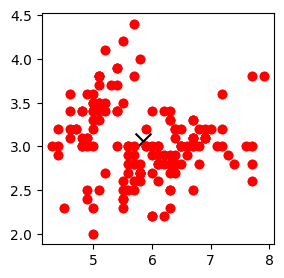

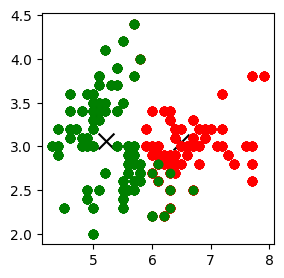

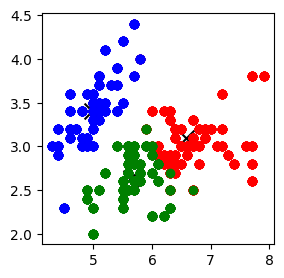

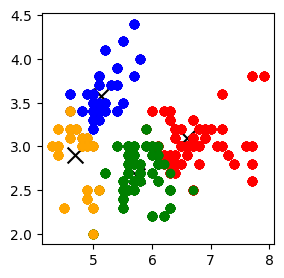

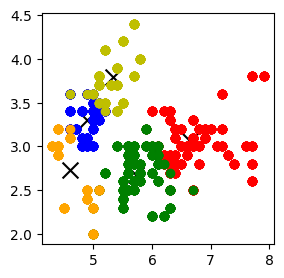

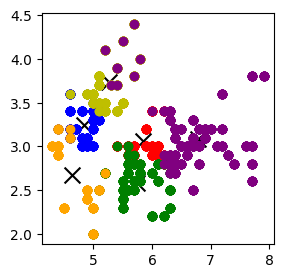

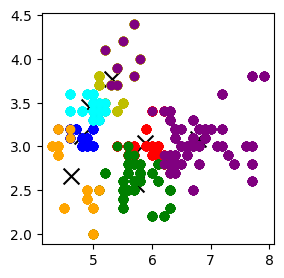

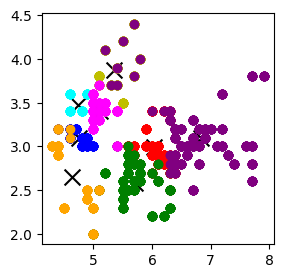

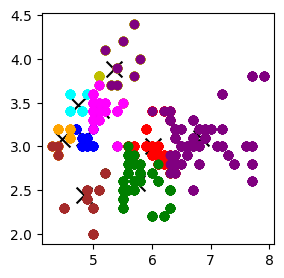

In [17]:
X, _ = load_iris(return_X_y=True)
X = X[:, :2]

cluster_distances = []
k_values = range(1, 10)

for idx, k in enumerate(k_values):
    centroids, clusters = kmeans(X, k, max_iterations=10, min_distance=0.01)
    visualize(centroids, clusters)
    distance = intra_cluster_distance(X, clusters, centroids)
    cluster_distances.append(distance)


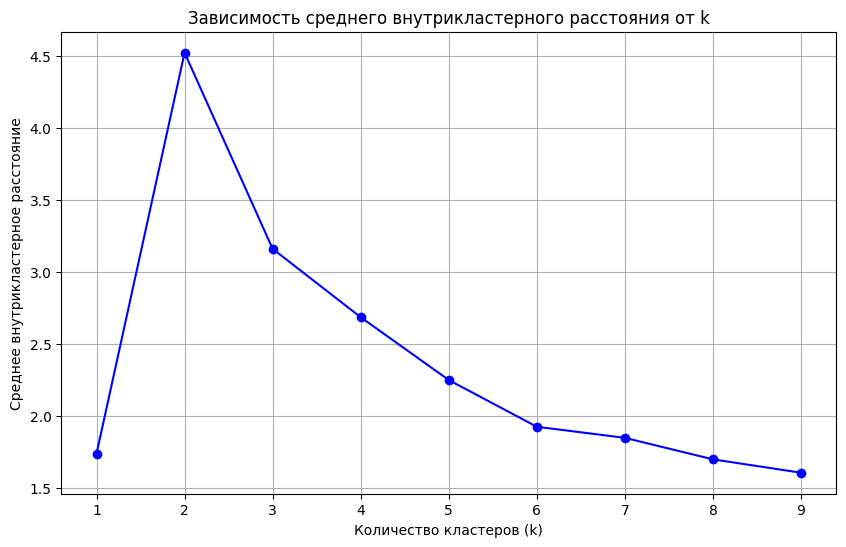

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cluster_distances, marker='o', linestyle='-', color='b')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Среднее внутрикластерное расстояние')
plt.title('Зависимость среднего внутрикластерного расстояния от k')
plt.grid()
plt.show()